<a href="https://colab.research.google.com/github/athospugliesedev/python_codes/blob/main/Aula_3__RegressaoMultilinear_Atividade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h align=left><font size = 6, style="color:rgb(200,0,0)">Atividade: Prever a temperatura </font></h>
<hr>

- Umidade e temperatura

# IMportando as bibliotecas

In [23]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Importando os dados

In [24]:
address = 'https://raw.githubusercontent.com/tuliofor/dados_aula/main/Weather_%20Szeged_Hungary_2006_2016.csv'
df = pd.read_csv(address)

In [25]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [28]:
df.shape


(96453, 12)

In [29]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


Exibindo nomes das colunas

# Pré-analise

In [30]:
df = df.drop(['Daily Summary', 'Summary', 'Loud Cover'], axis = 1)
df = df.rename(columns = {"Temperature (C)":"Temperature",
                          "Wind Speed (km/h)":"Wind Speed",
                           "Apparent Temperature (C)":"Apparent Temperature",
                            "Visibility (km)":"Visibility",
                            "Wind Bearing (degrees)":"Wind Bearing",
                            "Pressure (millibars)":"Pressure"})


In [31]:
df.columns


Index(['Formatted Date', 'Precip Type', 'Temperature', 'Apparent Temperature',
       'Humidity', 'Wind Speed', 'Wind Bearing', 'Visibility', 'Pressure'],
      dtype='object')

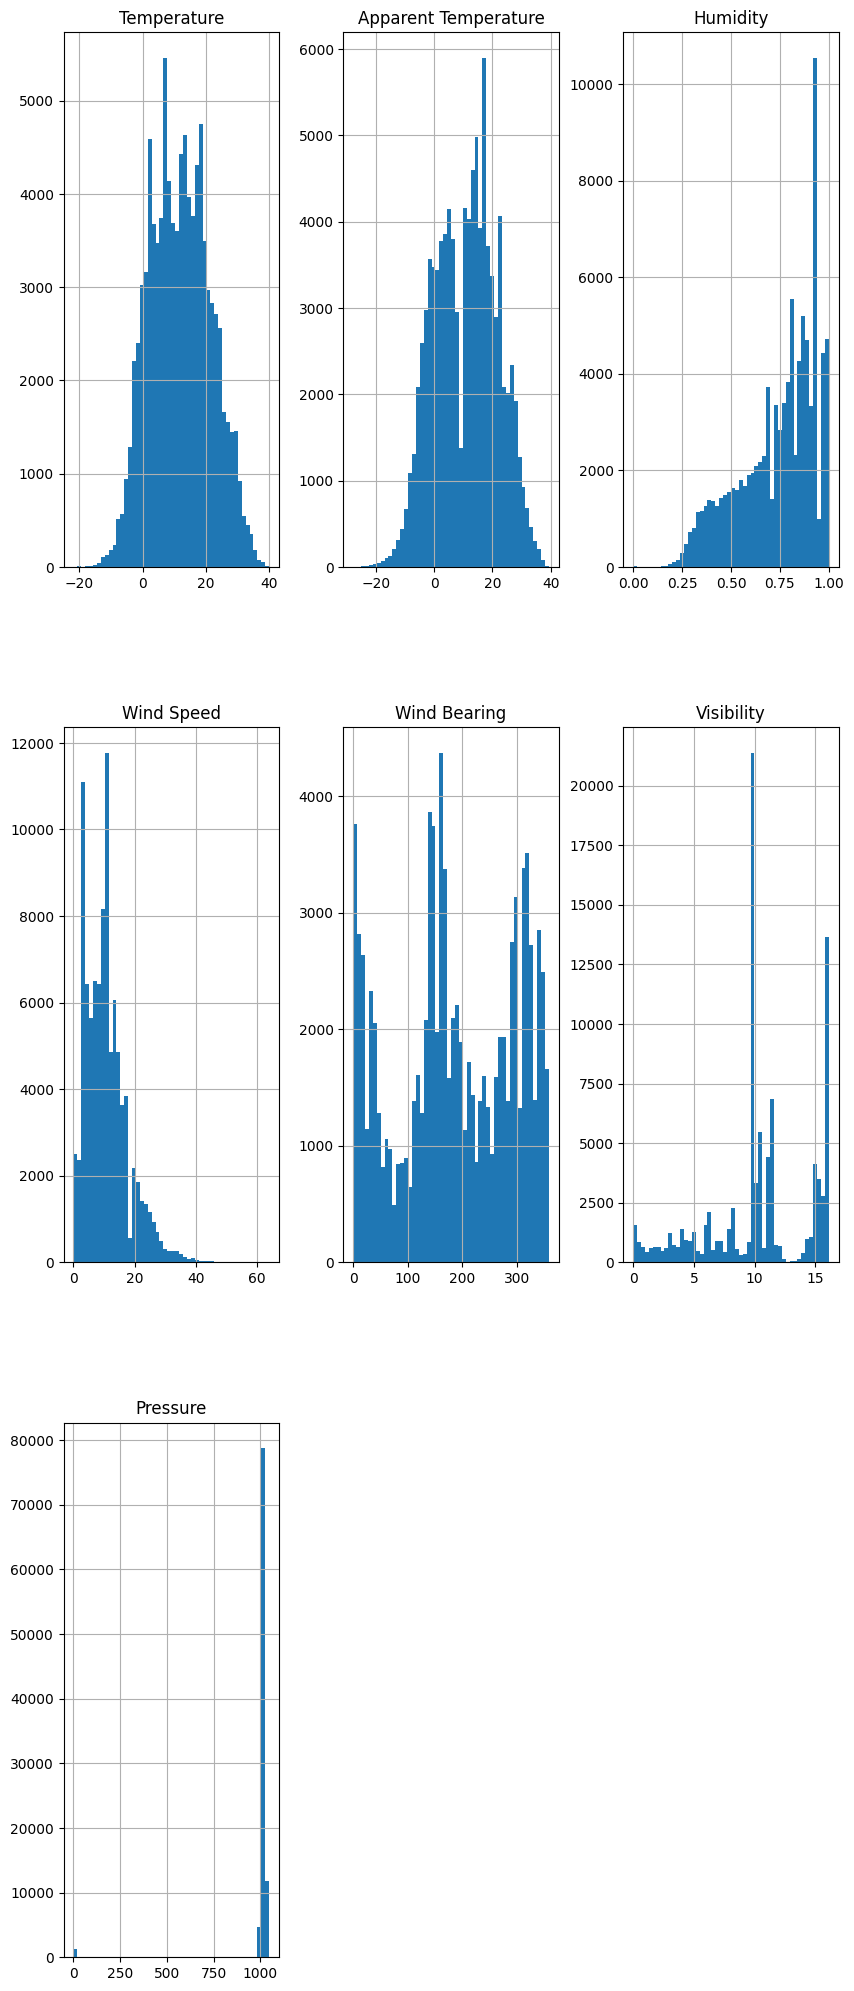

In [32]:
df.hist(bins = 50, figsize = (10,25))
plt.show()


In [34]:
df = df.replace(np.nan, 'other', regex=True)
set(df["Precip Type"].values)


{'other', 'rain', 'snow'}

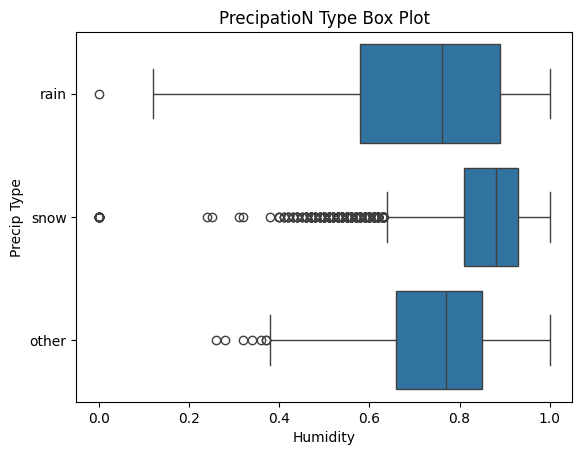

In [35]:
sns.boxplot(x =  df["Humidity"],y = df["Precip Type"])
plt.title("PrecipatioN Type Box Plot")
plt.show()


In [36]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], format='%Y-%m-%d %H:%M:%S.%f %z')
df['Year'] = df['Formatted Date'].apply(lambda x: x.year)
df['Month'] = df['Formatted Date'].apply(lambda x: x.month)
df['Day'] = df['Formatted Date'].apply(lambda x: x.day)
df['Hour'] = df['Formatted Date'].apply(lambda x: x.hour)


In [37]:
df


,Formatted Date,Precip Type,Temperature,Apparent Temperature,Humidity,Wind Speed,Wind Bearing,Visibility,Pressure,Year,Month,Day,Hour
0,2006-04-01 00:00:00+02:00,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,2006,4,1,0
1,2006-04-01 01:00:00+02:00,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,2006,4,1,1
2,2006-04-01 02:00:00+02:00,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006,4,1,2
3,2006-04-01 03:00:00+02:00,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,2006,4,1,3
4,2006-04-01 04:00:00+02:00,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,2006,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00+02:00,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,2016,9,9,19
96449,2016-09-09 20:00:00+02:00,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,2016,9,9,20
96450,2016-09-09 21:00:00+02:00,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,2016,9,9,21
96451,2016-09-09 22:00:00+02:00,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,2016,9,9,22


# Definindo as Variaveis Independentes e Dependentes

In [39]:
[dfTrain,dfTest] = train_test_split(df.drop(['Formatted Date','Year','Month','Day'],axis=1),random_state=1234,test_size=0.4)


# Importando o modelo de aprendizado de máquina

In [40]:
xTrain = dfTrain["Humidity"].values
xTest  = dfTest["Humidity"].values
yTrain = dfTrain["Temperature"].values
yTest  = dfTest["Temperature"].values

xTrain = np.reshape(xTrain,(-1,1))
xTest = np.reshape(xTest,(-1,1))


In [41]:
linReg = LinearRegression()
linReg.fit(xTrain,yTrain)


LinearRegression()

In [42]:
print(f"Intercepts:  {linReg.intercept_}")
print(f"Coefficients:  {linReg.coef_}")


Intercepts:  34.67141946019423
Coefficients:  [-30.96347094]


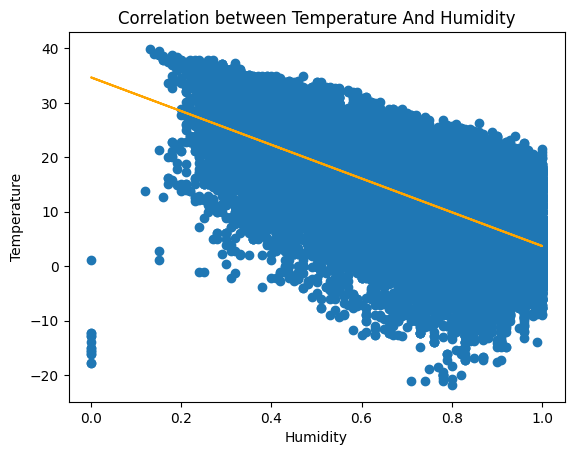

In [43]:
yTestPredicted = linReg.predict(xTest)
plt.scatter(xTrain,yTrain)
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.title("Correlation between Temperature And Humidity")
plt.plot(xTest,yTestPredicted,color="orange")
plt.show()


In [44]:
print("RMSE test set: ",np.sqrt(mean_squared_error(yTest,yTestPredicted)))
print("R^2 score: ",linReg.score(xTest,yTest))


RMSE test set:  7.393057970127397
R^2 score:  0.3990707303279296


# Prevendo temperatura toda hora

In [45]:
xTrain = dfTrain[["Temperature","Humidity","Wind Speed"]].values
yTrain = dfTrain["Apparent Temperature"].values

xTest = dfTest[["Temperature","Humidity","Wind Speed"]].values
yTest = dfTest["Apparent Temperature"].values


In [46]:
linReg = LinearRegression()
linReg.fit(xTrain,yTrain)
print(f"Intercepts:  {linReg.intercept_}")
print(f"Coefficients:  {linReg.coef_}")


Intercepts:  -2.294058318242408
Coefficients:  [ 1.12583139  1.01884332 -0.09549998]


In [47]:
yTrainPredicted = linReg.predict(xTrain)
RMSETrain = np.sqrt(mean_squared_error(yTrain,yTrainPredicted))
print(f"RMSE train set: {RMSETrain}")


RMSE train set: 1.0793621432981388


In [48]:
yTestPredicted = linReg.predict(xTest)


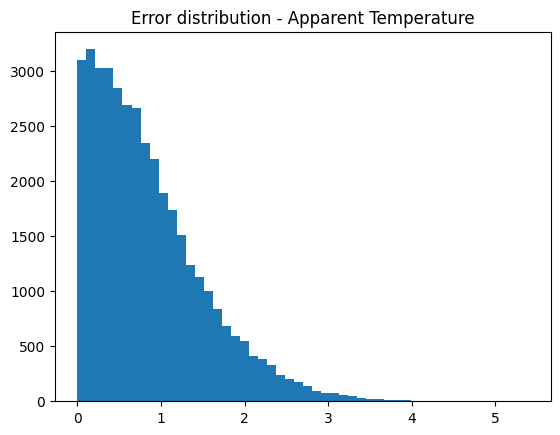

In [49]:
errors = np.abs(yTestPredicted - yTest)
plt.figure()
plt.title("Error distribution - Apparent Temperature")
plt.hist(x = errors, bins = 50)
plt.show()

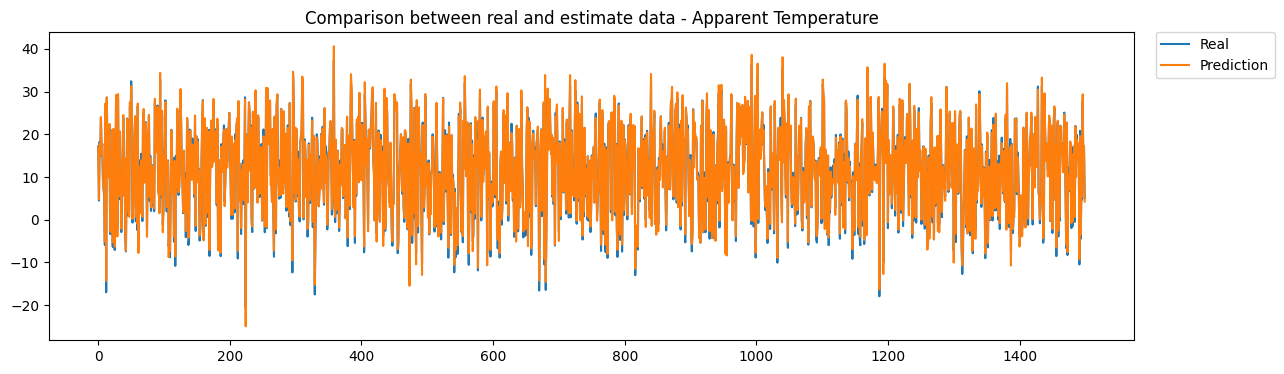

In [50]:
plt.figure(figsize=(14, 4))
plt.title("Comparison between real and estimate data - Apparent Temperature")
plt.plot(yTest[0:1500], label='Real')
plt.plot(yTestPredicted[0:1500], label='Prediction')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.show()


In [51]:
RMSETest = np.sqrt(mean_squared_error(yTest,yTestPredicted))
R2Test = linReg.score(xTest,yTest)
print(f"RMSE score test: {RMSETest}")
print(f"R2 score test: {R2Test}")


RMSE score test: 1.080129952197552
R2 score test: 0.989762960917948
